In [ ]:
%pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 14.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gymnasium as gym
from typing import Optional
import matplotlib.pyplot as plt

In [ ]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: gym.spaces.discrete.Discrete,
        action_space: gym.spaces.discrete.Discrete,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        """
        Args:
            observation_space: the state space
            action_space:      the action space
            learning_rate:     the rate at which the Q-values are updated
            gamma:             the discount factor for future rewards
            epsilon:           the exploration rate for the epsilon-greedy strategy
        """
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        # Qualities of state-action combination:
        # Q : S x A -> R
        self.q_table = np.zeros((500, 6))

    def __call__(self, state: int, action: int) -> float:
        """ Return Q-value of given state and action. """

        return self.q_table[state, action]

    def update(self, state: int, action: int, reward: float, next_state: int, done: bool) -> None:
        """Update Q-value of given state and action."""

        max_future_q = np.max(self.q_table[next_state]) if not done else 0
        current_q = self.q_table[state, action]

        """
        new_Q (S_t, A_t) = (1 - α) * Q (S_t, A_t) + α * (R_t+1 + γ * max_Q[a](S_t+1, a))
        where:
            S_t - current state
            A_t - current action
            α - learning rate
            R_t+1 - reward received after taking action A_t in state S_t
            γ - discount factor for future rewards
            max_Q[a](S_t+1, a) - maximum Q-value for all possible actions in state S_t+1
        """
        # new_q = (1 - self.learning_rate) * self.q_table[state][action] + self.learning_rate * (reward + self.gamma * max_future_q)
        new_q = self.q_table[state][action] \
              + self.learning_rate * reward \
              + self.learning_rate * self.gamma * max_future_q - self.learning_rate * current_q

        self.q_table[state, action] = new_q

    def get_best_action(self, state: int) -> int:
        """Return action that maximizes Q-value for a given state."""

        return int(np.argmax(self.q_table[state]))

    def select_action(self, state: int) -> int:
        """Select action using epsilon-greedy strategy"""

        if np.random.random() < self.epsilon:
            # Exploration: choose random action
            return int(self.action_space.sample())
        else:
            # Exploitation: choose action with the highest Q-value
            return self.get_best_action(state)

    def train(self, env: gym.Env, episodes: int = 1000, max_steps_per_episode: int = 100) -> None:
        """
        Train the Q-learning solver on the given environment
        """

        for episode in range(episodes):
            # print (f"Episode {episode+1}/{episodes}")
            state, _ = env.reset()
            done = False
            truncated = False
            steps = 0
            while not done and not truncated and steps <= max_steps_per_episode:
                action = self.select_action(state)
                next_state, reward, done, truncated, _ = env.step(action)
                reward = float(reward)
                self.update(state, action, reward, next_state, done)
                state = next_state
                steps += 1

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        cls = self.__class__.__name__
        return f"{cls}(observation_space={self.observation_space}, action_space={self.action_space}, learning_rate={self.learning_rate}, gamma={self.gamma}, epsilon={self.epsilon})"

    def __str__(self):
        return self.__repr__()

In [ ]:
def make_graph(x, y, title, x_label) -> None:
    plt.clf()
    plt.title(title)
    plt.scatter(x, y, color='red', s=100, label='Highlighted Points')
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel("Number of steps")
    plt.show()


In [ ]:
def test_QLearning_solver(
    learning_rate: float = 0.1,
    gamma: float = 0.9,
    epsilon: float = 0.1,
    episodes: int = 1000,
    max_steps_per_episode: int = 100,
    verbose: bool = False
    ):
    env = gym.make("Taxi-v3")
    solver = QLearningSolver(
        observation_space=env.observation_space,
        action_space=env.action_space,
        learning_rate= learning_rate,
        gamma= gamma,
        epsilon= epsilon
    )

    solver.train(env = env, episodes = episodes, max_steps_per_episode=max_steps_per_episode)

    if verbose:
      env_test = gym.make("Taxi-v3", render_mode="human", max_episode_steps=500)
    else:
      env_test = gym.make("Taxi-v3")
    state, _ = env_test.reset()
    done = False
    truncated = False
    move_count = 0
    while not done and not truncated:
        action = solver.get_best_action(state)
        state, reward, done, truncated, _ = env_test.step(action)
        if verbose:
          env_test.render()
        move_count += 1

    return move_count


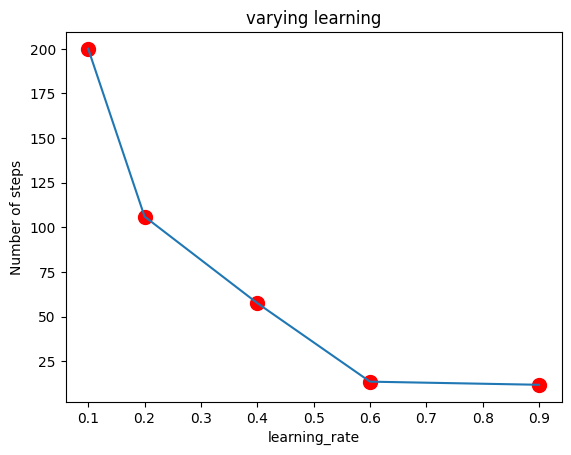

In [ ]:
test_args = [
    # Varying learning_rate
    (0.1, 0.9, 0.1, 1000, 150),
    (0.2, 0.9, 0.1, 1000, 150),
    (0.4, 0.9, 0.1, 1000, 150),
    (0.6, 0.9, 0.1, 1000, 150),
    (0.9, 0.9, 0.1, 1000, 150),
]

move_counts = []
x_params = []

for arg_tup in test_args:
    steps = np.array([])
    learning_rate, gamma, epsilon, episodes, max_steps_per_episode = arg_tup
    for count in range(4):
      move_count = test_QLearning_solver(learning_rate, gamma, epsilon, episodes, max_steps_per_episode)
      steps = np.append(steps, move_count)
    move_counts.append(np.mean(steps))
    x_params.append(learning_rate)

make_graph(x_params, move_counts, "varying learning", "learning_rate")

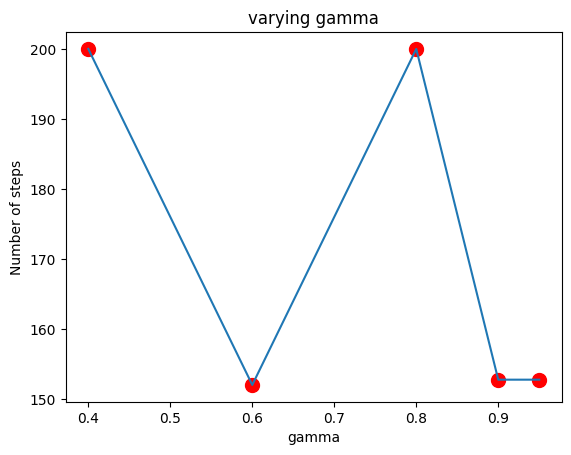

In [ ]:
test_args = [
    # Varying gamma
    (0.1, 0.4, 0.1, 1000, 150),
    (0.1, 0.6, 0.1, 1000, 150),
    (0.1, 0.8, 0.1, 1000, 150),
    (0.1, 0.9, 0.1, 1000, 150),
    (0.1, 0.95, 0.1, 1000, 150)
]

move_counts = []
x_params = []

for arg_tup in test_args:
    steps = np.array([])
    learning_rate, gamma, epsilon, episodes, max_steps_per_episode = arg_tup
    for _ in range(4):
      move_count = test_QLearning_solver(learning_rate, gamma, epsilon, episodes, max_steps_per_episode)
      steps = np.append(steps, move_count)
    move_counts.append(np.mean(steps, 0))
    x_params.append(gamma)

make_graph(x_params, move_counts, "varying gamma", "gamma")

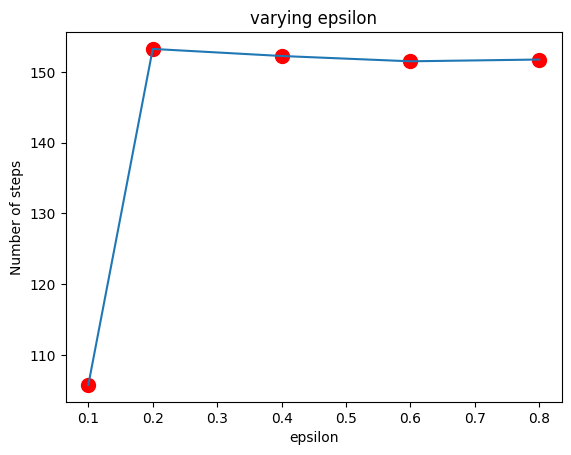

In [ ]:
test_args = [
    # Varying epsilon
    (0.1, 0.9, 0.1, 1000, 150),
    (0.1, 0.9, 0.2, 1000, 150),
    (0.1, 0.9, 0.4, 1000, 150),
    (0.1, 0.9, 0.6, 1000, 150),
    (0.1, 0.9, 0.8, 1000, 150),
]

move_counts = []
x_params = []

for arg_tup in test_args:
    steps = np.array([])
    learning_rate, gamma, epsilon, episodes, max_steps_per_episode = arg_tup
    for _ in range(4):
      move_count = test_QLearning_solver(learning_rate, gamma, epsilon, episodes, max_steps_per_episode)
      steps = np.append(steps, move_count)
    move_counts.append(np.mean(steps, 0))
    x_params.append(epsilon)

make_graph(x_params, move_counts, "varying epsilon", "epsilon")


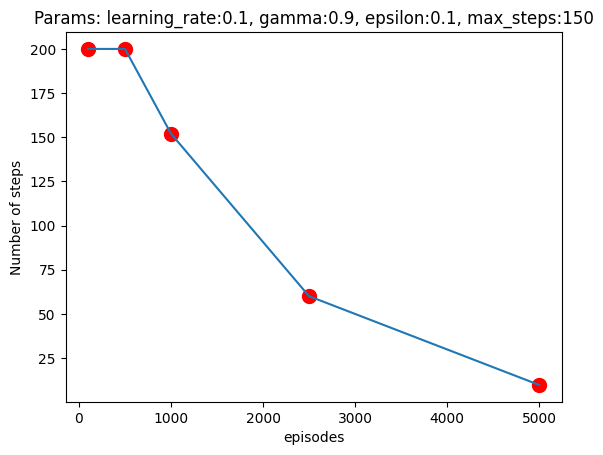

In [ ]:
test_args = [
    # Varying episodes
    (0.1, 0.9, 0.1, 100, 150),
    (0.1, 0.9, 0.1, 500, 150),
    (0.1, 0.9, 0.1, 1000, 150),
    (0.1, 0.9, 0.1, 2500, 150),
    (0.1, 0.9, 0.1, 5000, 150)
]

move_counts = []
x_params = []

for arg_tup in test_args:
    steps = np.array([])
    learning_rate, gamma, epsilon, episodes, max_steps_per_episode = arg_tup
    for _ in range(4):
      move_count = test_QLearning_solver(learning_rate, gamma, epsilon, episodes, max_steps_per_episode)
      steps = np.append(steps, move_count)
    move_counts.append(np.mean(steps, 0))
    x_params.append(episodes)

make_graph(x_params, move_counts, f"Params: learning_rate:{learning_rate}, gamma:{gamma}, epsilon:{epsilon}, max_steps:{max_steps_per_episode}", "episodes")


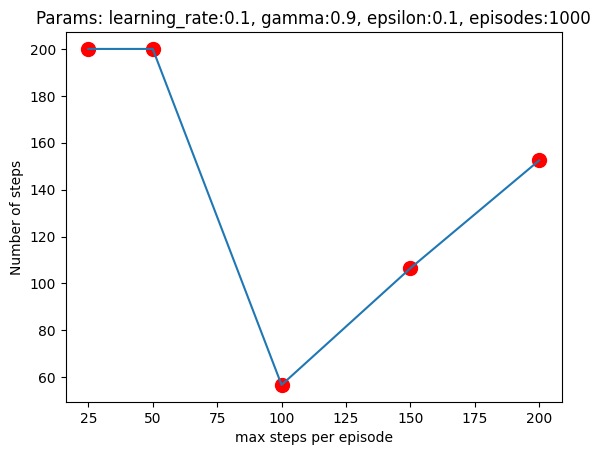

In [ ]:
test_args = [
    # Varying max_steps_per_episode
    (0.1, 0.9, 0.1, 1000, 25),
    (0.1, 0.9, 0.1, 1000, 50),
    (0.1, 0.9, 0.1, 1000, 100),
    (0.1, 0.9, 0.1, 1000, 150),
    (0.1, 0.9, 0.1, 1000, 200),
]

move_counts = []
x_params = []

for arg_tup in test_args:
    steps = np.array([])
    learning_rate, gamma, epsilon, episodes, max_steps_per_episode = arg_tup
    for _ in range(4):
      move_count = test_QLearning_solver(learning_rate, gamma, epsilon, episodes, max_steps_per_episode)
      steps = np.append(steps, move_count)
    move_counts.append(np.mean(steps, 0))
    x_params.append(max_steps_per_episode)

make_graph(x_params, move_counts, f"Params: learning_rate:{learning_rate}, gamma:{gamma}, epsilon:{epsilon}, episodes:{episodes}", "max steps per episode")


Hiperparametry:
  1. Learning rate - ten parametr świadczy o tym jak szybko algorytm się "uczy"; to jest jak silnie update wpływa na tablicę nagród, czyli jak bardzo istotny jest każdy update, jako jeden z wielu.

  2. Gamma - świadczy o tym czy wybieramy ruch bardziej zachłannie, czy raczej stawiamy na ogół trasy. Niska gamma zwiększa zachłanność algorytmu i preferuje najwyższą nagrodę w tym konkrentym ruchu, natomiast wysoka wartość gammy

  3. Epsilon - jego wartość stanowi o stosunku eksploracji do eksploitacji. Eksploracja przestrzeni (poznawanie) wybiera losowo dostępny ruch i potencjalnie pozwala uzyskać informacje o bardziej optymalnej trasie, ale takiej, której jeszcze nie widzieliśmy. Natomiast eksploitacja to odczytanie wartości z tabeli i wybranie najlepszego możliwego ruchu.